If you are using Anaconda/Jupyter Notebooks, you should already have scikit-learn installed from last lecture. If that is not the case, please run the code below.

In [4]:
conda install -c anaconda scikit-learn

Everyone should run the code below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Part 1: Discovering the dataset

For this first part, we will be using a very small and easy dataset `women_data` for illustrative purposes. Please download it from the course website.

In [2]:
#make sure you upload the dataset to Google Colab before trying to run this
women_data=pd.read_csv("women_data.csv")

1. What does the dataset look like?

In [3]:
women_data

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


2.Plot using `plt.scatter` the weight of the women as a function of the height.

Text(0, 0.5, 'weight')

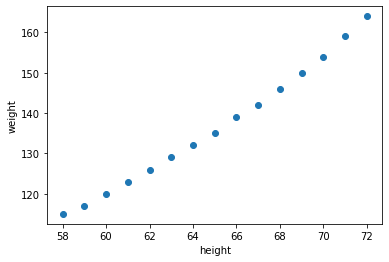

In [61]:
plt.scatter(women_data["height"],women_data["weight"])
plt.xlabel("height")
plt.ylabel("weight")

# Part 2: Linear regression with scikit

1. Fitting the model

In [18]:
from sklearn.linear_model import LinearRegression

In [78]:
#fitting the model

X=womend[["height"]]
Y=womend[["weight"]]

lm = LinearRegression().fit(X, Y)

2. Getting relevant quantities:

In [79]:
#getting the valid quantities

print("Intercept = ",lm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", lm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",lm.score(X,Y)) # Print the resultant model R-squared

Intercept =  [-87.51666667]
Model coefficients =  [[3.45]]
R^2 = 0.9910098326857505


3. Getting the predictions for the heights we have, based off of our model.

In [80]:
Y_pred=lm.predict(X)

4. Plot on the same graph (1) the original datapoints (use `plt.scatter`) and (2) the prediction line (use `plt.plot` and the appropriate datapoints!)

Text(0, 0.5, 'weight')

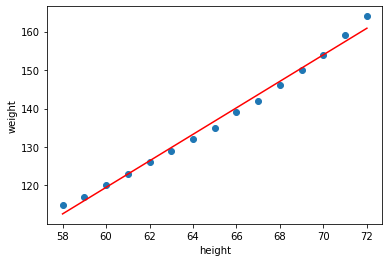

In [84]:
plt.scatter(X,Y)
plt.plot(X,Y_pred,c="red")
plt.xlabel("height")
plt.ylabel("weight")

# Part 3: Polynomial regression with scikit

In [4]:
from sklearn.preprocessing import PolynomialFeatures

1. First define the degree of the polynomial you want to fit, and then `X` and `Y`.

In [56]:
degree=3
X=women_data[["height"]]
Y=women_data[["weight"]]

2. Create a polynomial: the data point 58 say becomes `[1, 58, 58^2, 58^3]`. Check it out!

In [57]:
poly = PolynomialFeatures(degree) #define the polynomial
X_poly=poly.fit_transform(X) #map all the values of X as [1,x,x^2,x^3, etc]

In [58]:
X

,height
0,58
1,59
2,60
3,61
4,62
5,63
6,64
7,65
8,66
9,67


In [59]:
X_poly

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

3. Now we fit a Linear Regression Model as explained in class. Run the code below.

In [60]:
polyreg = LinearRegression().fit(X_poly, Y)

4. What are the coeficients? Is the R^2 better for a polynomial regression of degree 3 than it is for the linear regression?

In [61]:
print(polyreg.coef_) #print these coefficients
print(polyreg.score(X_poly,Y)) #print R^2

[[ 0.00000000e+00  4.64107891e+01 -7.46184371e-01  4.25255572e-03]]
0.9997816939979363


5. Predict the values for the heights we have based on our polynomial regression model.

In [62]:
y_pred=polyreg.predict(X_poly)

6. Plot the points using `plt.scatter()`. We are going to use something a bit more complicated to plot the curve for polynomials: indeed, a line is defined by two points, but to be able to see how a polynomial behaves, we need many more points!

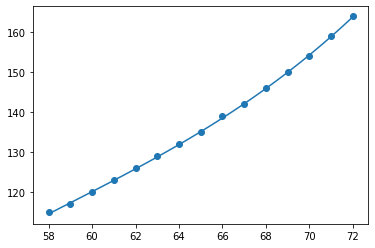

In [64]:
plt.scatter(X,Y)

linepoints = np.linspace(np.min(X), np.max(X), 100) # create 100 points between 58 and 72
linepoints_poly=poly.fit_transform(linepoints) #transform these datapoints into polynomial datapoints
linepoints_pred=polyreg.predict(linepoints_poly) #then predict the value we would get on these points with our model

plt.plot(linepoints,linepoints_pred)


# Part 4: Selling ice-creams

Make sure the .csv file containing M. Gelato's sales is in your current directory or uploaded onto Google Colab before you start. 

1. Load the document and take a look at its header.

In [65]:
Gelato=pd.read_csv("Gelato_Times_Sales.csv")
Gelato

,Times,Sales
0,1,122
1,29,215
2,60,228
3,88,225
4,121,190
5,150,145
6,184,125
7,218,43
8,250,12
9,281,4


2. Create a new feature called `TimesYear` which corresponds to the `Times` column divided by 365. Drop the column `Times` once you are done to recover a dataframe with just two features.
    1. Are we normalizing or scaling the data?
    2. We will be working with polynomials of degree up to 12. Can you explain why we're normalizing or scaling the data?

In [66]:
Gelato["TimesYear"]=Gelato["Times"]/365

In [67]:
Gelato.drop(columns=["Times"],inplace=True)

In [68]:
Gelato

,Sales,TimesYear
0,122,0.002740
1,215,0.079452
2,228,0.164384
3,225,0.241096
4,190,0.331507
5,145,0.410959
6,125,0.504110
7,43,0.597260
8,12,0.684932
9,4,0.769863


3. Define `X`and `Y`. What should they be here?

In [69]:
X=Gelato[["TimesYear"]]
Y=Gelato[["Sales"]]

4. **Scatter plot**: plot Y as a function of X using `plt.scatter()`.

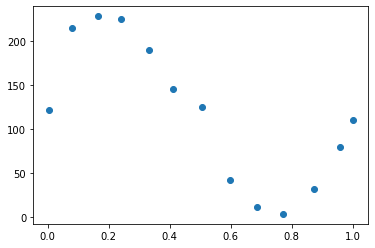

In [70]:
plt.scatter(X,Y)

5. Similarly to what is done in part 2, fit first a linear regression model to the data. Keep track of the R^2 and plot the curve you obtain as well as the datapoints on one plot.

R^2 = 0.5156537598990749


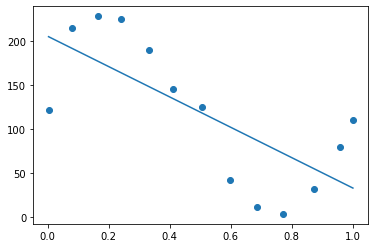

In [71]:
lm = LinearRegression().fit(X, Y)

print("R^2 =",lm.score(X,Y)) # Print the resultant model R-squared
y_pred=lm.predict(X)

plt.scatter(X,Y)
plt.plot(X,y_pred)

5. Similarly to what is done in part 3, fit a polyonomial regression to the data with degree=2. Keep track of the R^2 and plot the curve you obtain as well as the datapoints on one plot.

In [73]:
from sklearn.preprocessing import PolynomialFeatures

degree=2

poly = PolynomialFeatures(degree) #define a polynomial
X_poly=poly.fit_transform(X) #map all the values of X as [1,x,x^2,x^3, etc]
polyreg = LinearRegression().fit(X_poly, Y) # try and find coefficients c1+c2*x+x3*x^2+... via linear regression

y_pred = polyreg.predict(X_poly)

print(polyreg.coef_) #print these coefficients
print(polyreg.score(X_poly,Y)) #print R^2

[[   0.         -282.05666395  107.68637281]]
0.5307269001557798


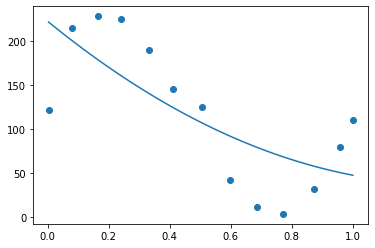

In [74]:
plt.scatter(X,Y)

linepoints = np.linspace(np.min(X), np.max(X), 100) # create 100 points between 58 and 72
linepoints_poly=poly.fit_transform(linepoints) #transform these datapoints into polynomial datapoints
linepoints_pred=polyreg.predict(linepoints_poly) #then predict the value we would get on these points with our model

plt.plot(linepoints,linepoints_pred)


6. Redo question 5 but with degrees 3,5, 8 and 12. Keep track of R^2 and the plot at each time.

[[ 0.00000000e+00 -3.33985615e+04  1.20402472e+06 -1.76445673e+07
   1.42152061e+08 -7.08740430e+08  2.31816932e+09 -5.11592593e+09
   7.66850543e+09 -7.69449999e+09  4.94574571e+09 -1.84031742e+09
   3.01385097e+08]]
1.0


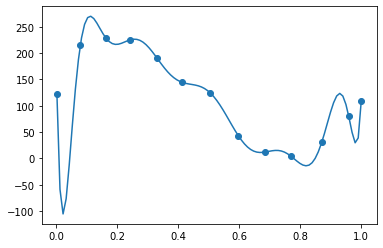

In [78]:
from sklearn.preprocessing import PolynomialFeatures

degree=12

poly = PolynomialFeatures(degree) #define a polynomial
X_poly=poly.fit_transform(X) #map all the values of X as [1,x,x^2,x^3, etc]
polyreg = LinearRegression().fit(X_poly, Y) # try and find coefficients c1+c2*x+x3*x^2+... via linear regression

y_pred = polyreg.predict(X_poly)

print(polyreg.coef_) #print these coefficients
print(polyreg.score(X_poly,Y)) #print R^2

plt.scatter(X,Y)

linepoints = np.linspace(np.min(X), np.max(X), 100) # create 100 points between 58 and 72
linepoints_poly=poly.fit_transform(linepoints) #transform these datapoints into polynomial datapoints
linepoints_pred=polyreg.predict(linepoints_poly) #then predict the value we would get on these points with our model

plt.plot(linepoints,linepoints_pred)

7. If you were to base yourself on R^2 only, which model would you end up picking and why? Does this coincide with what looks visually most appropriate? Do you think using R^2 is a good measure of how good a model is? What would you suggest as a better way of picking a model?

# Homework Task 2

If we have 1000 observations, we would like to have 500 in the training set, 250 in the validation set, and 250 in the test set. To do this, we can first split the dataset into two to obtain training set and others, i.e.:

`Xtrain Xother ytrain yother= train_test_split(X,y,test_size=0.5)`

This will give us a training set of size 500 and another set that contains 500 datapoints. To obtain the validation set and test set, we further subdivide `Xother` and `yother` by taking:

`Xvalidation Xtest yvalidation ytest= train_test_split(Xother,yother,test_size=0.5)`

This gives us sets of appropriate size.

# Homework Task 3

Don't forget to upload the data if you are on Google Colab.

In [100]:
Sarah_data_cleaned= pd.read_csv("Sarah_data_cleaned.csv")

## Part 1: Creating the label and the features, the validation and test sets.

1. What should the label `y` be? Construct `y` and drop this column from the dataset to obtain `X`.

In [81]:
y=Sarah_data_cleaned[["Price"]]
X=Sarah_data_cleaned.drop(columns=["Price"])

2. Split X and y into training and validation sets (the validation set should contain 1000 of the 6000 rows of data) so that you obtain `X_train, X_validation, y_train, y_validation`.

In [83]:
X_train, X_validation, y_train, y_validation= train_test_split(X, y, test_size=1/6)

In [84]:
X_validation

,Unnamed: 0,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
3056,3056,2.05,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3669,3669,2.01,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,1
5867,5867,2.08,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5588,5588,2.01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1923,1923,2.61,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,881,0.79,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2700,2700,1.50,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2210,2210,1.03,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4723,4723,2.03,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [85]:
X_train

,Unnamed: 0,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
4969,4969,1.03,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3337,3337,1.70,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4062,4062,1.01,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
357,357,1.08,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
352,352,2.02,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,4681,1.01,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4916,4916,2.58,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3224,3224,0.81,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1618,1618,0.88,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [86]:
y_train

,Price
4969,4782.0
3337,16240.0
4062,5174.0
357,5558.0
352,19442.0
...,...
4681,4207.0
4916,39821.0
3224,3514.0
1618,2699.0


## Part 2: Training a simple linear regression on the dataset

1. Run a linear regression using scikit-learn. What is `R^2`? The model coefficients?

In [87]:
lm = LinearRegression().fit(X_train, y_train) # Fit a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", lm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",lm.score(X_train,y_train)) # Print the resultant model R-squared


Intercept =  [26212.08263472]
Model coefficients =  [[ 4.82262555e-02  1.84301057e+04 -4.32564914e+02  1.40313904e+02
   1.61669650e+03 -1.52022489e+02 -2.19045517e+03 -2.97593939e+03
  -4.72662454e+03 -6.26836630e+03 -7.91563231e+03 -2.67077528e+04
  -3.69754661e+04 -3.40600489e+04 -3.54376485e+04 -3.06613970e+04
  -3.26200688e+04 -4.88116527e+01 -2.43468102e+02 -6.72759067e+01
  -4.17549441e+02 -5.35985867e+01 -2.90960705e+02  2.80513135e+02]]
R^2 = 0.8612670134367234


2. As seen in class, use `.predict` to obtain the predicted values on the **validation dataset**. Then use `mean_squared_error` to compute the distance between these predicted values and the true values. Take its square root so that its unit is the same as the price. What do you think? You may want to compare to the average price predicted.

In [88]:
y_pred = lm.predict(X_validation)

In [89]:
mean_squared_error(y_validation,y_pred)**(1/2)

3599.085627662218

(array([588., 173., 114.,  70.,  35.,  11.,   2.,   3.,   3.,   1.]),
 array([ 2184. ,  9668.9, 17153.8, 24638.7, 32123.6, 39608.5, 47093.4,
        54578.3, 62063.2, 69548.1, 77033. ]),
 <BarContainer object of 10 artists>)

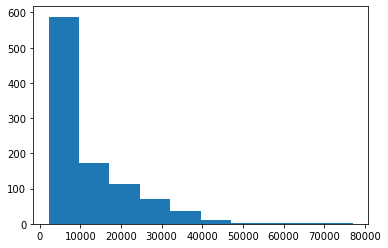

In [90]:
plt.hist(y_validation)

This is quite high as a deviation compared to the values that price takes.

## Part 3: Training a log-log model on the dataset

The *Sarah gets a diamond* case makes a good case for why the log-log model would work well in this set-up. Let's also construct this model. 

1. Using `.copy()` to make copies `X_train_log, X_validation_log, y_train_log` of `X_train, X_validation, y_train`. Apply a log transform to the copy of `y_train` and to the `Carat Weight` columns of the copies of `X_train` and `X_validation`.

In [92]:
from numpy import log
X_train_log=X_train.copy()
X_validation_log=X_validation.copy()
y_train_log=y_train.copy()

In [93]:
X_train_log["Carat Weight"]=X_train_log["Carat Weight"].apply(log)
X_validation_log["Carat Weight"]=X_validation_log["Carat Weight"].apply(log)
y_train_log=y_train_log.apply(log)

2. Fit a linear regression to `(X_train_log, y_train_log)` using sklearn.

In [96]:
lm = LinearRegression().fit(X_train_log, y_train_log) # Fit a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", lm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",lm.score(X_train_log,y_train_log)) # Print the resultant model R-squared

Intercept =  [9.45002563]
Model coefficients =  [[ 4.54778263e-07  1.98743091e+00  4.82547740e-02  1.07100791e-01
   2.50782851e-01  7.62030452e-02 -8.59211803e-02 -1.21270855e-01
  -2.19380821e-01 -3.50352434e-01 -4.93366078e-01 -2.94903759e-01
  -8.64399799e-01 -6.21693263e-01 -7.02182233e-01 -4.18057461e-01
  -4.96085260e-01 -3.57240464e-02  2.91968649e-02 -1.93894898e-02
  -2.35771791e-02 -1.07808624e-02 -2.07441792e-02  4.40264353e-02]]
R^2 = 0.9792612663947216


3. Use `.predict` to obtain the predicted values on `X_validation_log`. Call these `y_pred_log`: note that `y_pred_log` are not exactly prices: we need to take the exponential of `y_pred_log` to have prices. Compute the mean squared error between `y_validation` and `np.exp(y_pred_log)` which is the exponential of `y_pred_log`. What do you think?

In [97]:
y_pred_log = lm.predict(X_validation_log)

In [98]:
mean_squared_error(y_validation,np.exp(y_pred_log))**(1/2)

1951.8035156679657

We've approximately halved the mean squared error by considering a log-log model.

## Part 4: Further improving the model

There are many different ways of improving this model. One way of improving the model would be to add new (relevant) features to it. To see what could maybe be new features to add, we proceed with a visualization using the raw data to which we have applied a log transform on the Price and the Carat Weight.

1. Take a look at the scatter plot below: 
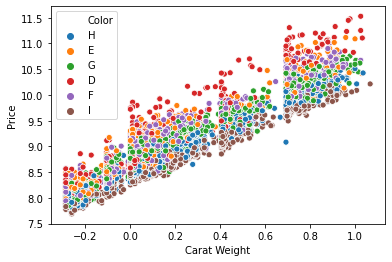

What can you say about the way the price increases as a function of carat weight as the color changes?

Price increases faster in Carat Weight for the diamonds of "better" colors (i.e., D, E, F). Our model has not learned that yet as there is only one coefficient for Carat Weight that does not change with Color. We can incorporate this in our model by adding new features that multiply Carat Weight with Color.

2. In `X_train_log` and `X_validation_log`, add 5 new features corrresponding to the product of `Carat Weight` and all the color features.

In [104]:
X_train_log['Carat Weight:Color_E'] = X_train_log['Carat Weight'] * X_train_log['Color_E']
X_train_log['Carat Weight:Color_F'] = X_train_log['Carat Weight'] * X_train_log['Color_F']
X_train_log['Carat Weight:Color_G'] = X_train_log['Carat Weight'] * X_train_log['Color_G']
X_train_log['Carat Weight:Color_H'] = X_train_log['Carat Weight'] * X_train_log['Color_H']
X_train_log['Carat Weight:Color_I'] = X_train_log['Carat Weight'] * X_train_log['Color_I']

In [105]:
X_validation_log['Carat Weight:Color_E'] = X_validation_log['Carat Weight'] * X_validation_log['Color_E']
X_validation_log['Carat Weight:Color_F'] = X_validation_log['Carat Weight'] * X_validation_log['Color_F']
X_validation_log['Carat Weight:Color_G'] = X_validation_log['Carat Weight'] * X_validation_log['Color_G']
X_validation_log['Carat Weight:Color_H'] = X_validation_log['Carat Weight'] * X_validation_log['Color_H']
X_validation_log['Carat Weight:Color_I'] = X_validation_log['Carat Weight'] * X_validation_log['Color_I']

3. Fit a linear regression model to the newly defined `(X_train_log, y_train_log)` using scikit-learn.

In [107]:
lm = LinearRegression().fit(X_train_log, y_train_log) # Fit a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant model intercept 

print("Model coefficients = ", lm.coef_) # Print the resultant model coefficients (in order of variables in X)

print("R^2 =",lm.score(X_train_log,y_train_log)) # Print the resultant model R-squared

Intercept =  [9.3494876]
Model coefficients =  [[ 3.86241294e-08  2.15715953e+00  4.91520878e-02  1.06358217e-01
   2.47769376e-01  7.60956474e-02 -6.51822966e-02 -1.05110096e-01
  -1.91539370e-01 -2.96164864e-01 -4.28762123e-01 -2.24007795e-01
  -7.81038916e-01 -5.42603860e-01 -6.19456027e-01 -3.43436544e-01
  -4.18171660e-01 -3.81459794e-02  3.28797148e-02 -2.05479070e-02
  -2.45676640e-02 -2.21378894e-02 -2.11473012e-02  3.67868822e-02
  -1.09075372e-01 -1.06796904e-01 -1.60876739e-01 -2.66266431e-01
  -2.97117701e-01]]
R^2 = 0.9810848025965505


4. Use `.predict` to obtain the predicted values on `X_train_log`. Call these `y_pred_log`: note that `y_pred_log` are not exactly prices: we need to take the exponential of `y_pred_log` to have prices. Compute the mean squared error between `y_validation` and `np.exp(y_pred_log)` which is the exponential of `y_pred_log`. What do you think?

In [108]:
y_pred_log = lm.predict(X_validation_log)

In [109]:
mean_squared_error(y_validation,np.exp(y_pred_log))**(1/2)

1684.5802602706626

There is a decrease of the MSE by simply adding these extra variables! We could keep making these kinds of improvements (e.g., maybe adding cut etc.)

5. Out of the three models (basic linear regression, log-log regression, log-log regression with added features), which one would you pick to try on the testing set? What do you need to do before sending your model to me to try on the testing set?

We would pick the third model as it has the smallest MSE. Before sending over the model, we should retrain it on all the dataset (training+validation).